In [1]:
!pip install xgboost
!pip install shap
import xgboost as xgb
import shap
import pandas as pd
import numpy as np

#visualisations
import matplotlib.pyplot as plt
import seaborn as sns

#préprocessing ML
from sklearn.preprocessing import StandardScaler

#modèle de ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


Looking in indexes: https://artifactory-iva.si.francetelecom.fr/artifactory/api/pypi/pythonproxy/simple
Looking in indexes: https://artifactory-iva.si.francetelecom.fr/artifactory/api/pypi/pythonproxy/simple


/opt/conda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Chargement des fichiers de données
mobilisation = pd.read_csv("LFB Mobilisation data Last 3 years.csv", header=0, sep=";")
incident = pd.read_csv("LFB Incident data Last 3 years.csv", header=0, sep=";")


In [3]:
# Merge des 2 datasets
total = pd.merge(incident, mobilisation, on='IncidentNumber')

In [25]:
# Informations sur le dataset
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587073 entries, 0 to 587072
Data columns (total 59 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          587073 non-null  object 
 1   DateOfCall                              587073 non-null  object 
 2   CalYear_x                               587073 non-null  int64  
 3   TimeOfCall                              587073 non-null  object 
 4   HourOfCall_x                            587073 non-null  int64  
 5   IncidentGroup                           587073 non-null  object 
 6   StopCodeDescription                     587073 non-null  object 
 7   SpecialServiceType                      125417 non-null  object 
 8   PropertyCategory                        587073 non-null  object 
 9   PropertyType                            587073 non-null  object 
 10  AddressQualifier                        5870

In [26]:
# Infos statsistiques sur le dataset
total.describe()

,CalYear_x,HourOfCall_x,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,...,Notional Cost (£),CalYear_y,HourOfCall_y,ResourceMobilisationId,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeReturned,PumpOrder,DelayCodeId
count,587073.000000,587073.000000,5.870730e+05,245022.000000,245022.000000,587073.000000,587073.000000,587071.000000,363278.000000,587073.000000,...,586918.000000,587073.000000,587073.000000,5.870730e+05,583264.000000,583190.000000,587073.000000,0.0,587073.000000,130554.000000
mean,2019.437169,13.436561,2.034563e+07,530616.268253,180380.129025,530609.777575,180478.671903,302.529938,381.372359,1.781140,...,561.010306,2019.437169,13.436561,5.515653e+06,74.713823,273.355311,346.676694,NaN,1.530385,10.453613
std,1.100283,6.337313,4.756913e+06,10327.850490,7456.724278,9555.952964,7315.466158,122.839720,141.538300,1.077614,...,2734.537861,1.100283,6.337313,2.631735e+05,39.421967,144.613354,147.993105,NaN,0.882175,2.198929
min,2018.000000,0.000000,4.200740e+06,503582.000000,155998.000000,503550.000000,155950.000000,1.000000,1.000000,1.000000,...,328.000000,2018.000000,0.000000,5.055153e+06,0.000000,0.000000,0.000000,NaN,1.000000,3.000000
25%,2018.000000,9.000000,2.040089e+07,525004.000000,175853.000000,525250.000000,176150.000000,225.000000,291.000000,1.000000,...,333.000000,2018.000000,9.000000,5.284859e+06,53.000000,177.000000,251.000000,NaN,1.000000,9.000000
50%,2019.000000,14.000000,2.120100e+07,530863.000000,180995.000000,530850.000000,181050.000000,286.000000,359.000000,1.000000,...,346.000000,2019.000000,14.000000,5.526700e+06,70.000000,250.000000,324.000000,NaN,1.000000,12.000000
75%,2020.000000,19.000000,2.210096e+07,536933.000000,185092.000000,536250.000000,185150.000000,359.000000,444.000000,2.000000,...,352.000000,2020.000000,19.000000,5.746405e+06,89.000000,340.000000,415.000000,NaN,2.000000,12.000000
max,2021.000000,23.000000,9.999042e+07,560461.000000,200885.000000,560450.000000,200850.000000,1200.000000,1200.000000,14.000000,...,407817.000000,2021.000000,23.000000,5.959304e+06,1160.000000,1182.000000,1200.000000,NaN,13.000000,13.000000


In [4]:
#Suppression des valeurs Nan
total = total.dropna(axis = 1)

In [28]:
#Vérification des valeurs Nan
total.isna().sum()

IncidentNumber                   0
DateOfCall                       0
CalYear_x                        0
TimeOfCall                       0
HourOfCall_x                     0
IncidentGroup                    0
StopCodeDescription              0
PropertyCategory                 0
PropertyType                     0
AddressQualifier                 0
Postcode_district                0
UPRN                             0
USRN                             0
IncGeo_BoroughCode               0
IncGeo_BoroughName               0
ProperCase                       0
Easting_rounded                  0
Northing_rounded                 0
FRS                              0
IncidentStationGround            0
NumStationsWithPumpsAttending    0
NumPumpsAttending                0
PumpCount                        0
CalYear_y                        0
HourOfCall_y                     0
ResourceMobilisationId           0
Resource_Code                    0
PerformanceReporting             0
DateAndTimeMobilised

In [5]:
# Ajout d'une nouvelle variable pour la prédiction à la minute
total['minute'] = total['AttendanceTimeSeconds']/60
total['minute'] =  total['minute'].astype('int64', copy=False)

In [6]:
#Separation du dataframe en 2 catégorie "variables catégorielles" et "variables qualitatives"
numerical_cols = [contname for contname in total.columns if total[contname].dtype in ['float64', 'int64']]
total_numerical = total[numerical_cols]

qualitative_cols = [contname for contname in total.columns if total[contname].dtype in ['object']]
total_qualitative = total[qualitative_cols]


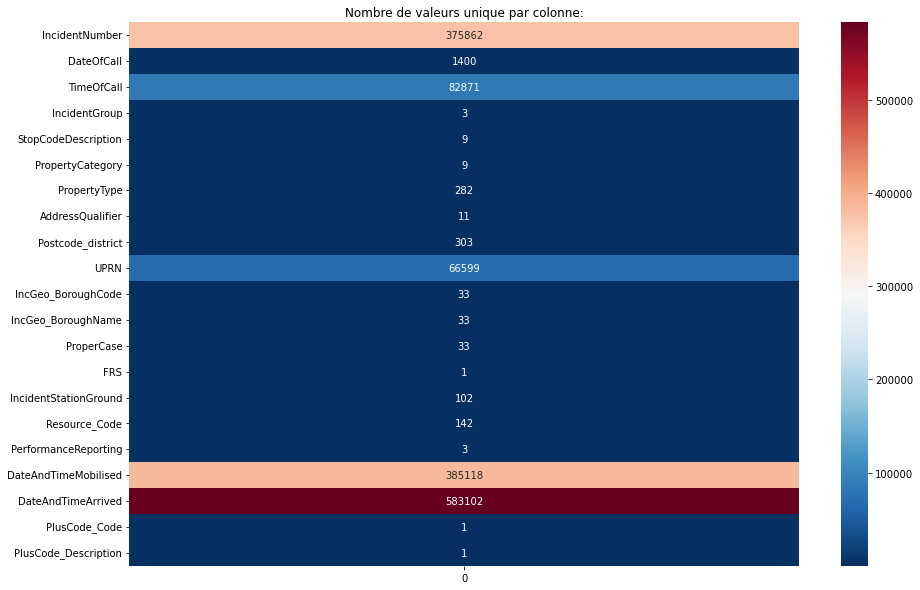

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=total_qualitative.nunique().to_frame(), cmap='RdBu_r',fmt='d',annot=True).set_title('Nombre de valeurs unique par colonne:');

In [8]:
# Suppression des modalités trop importantes et qui ne représente pas une notion métier capitale
total_qualitative = total_qualitative.drop(["IncidentNumber", "Postcode_district", "DateOfCall", "TimeOfCall", "UPRN", "FRS", "DateAndTimeMobilised", "DateAndTimeArrived", "PlusCode_Code", "PlusCode_Description"], axis = 1)


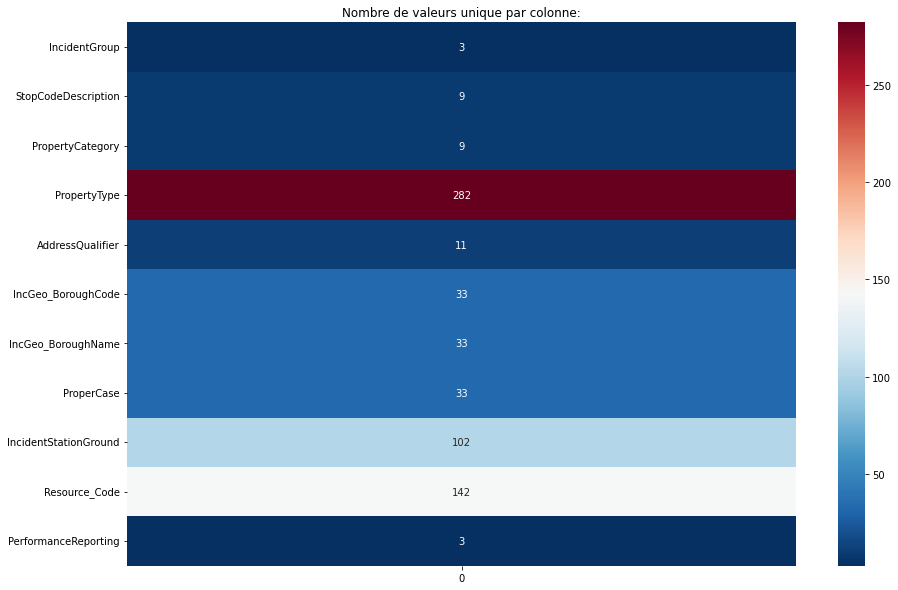

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=total_qualitative.nunique().to_frame(), cmap='RdBu_r',fmt='d',annot=True).set_title('Nombre de valeurs unique par colonne:');

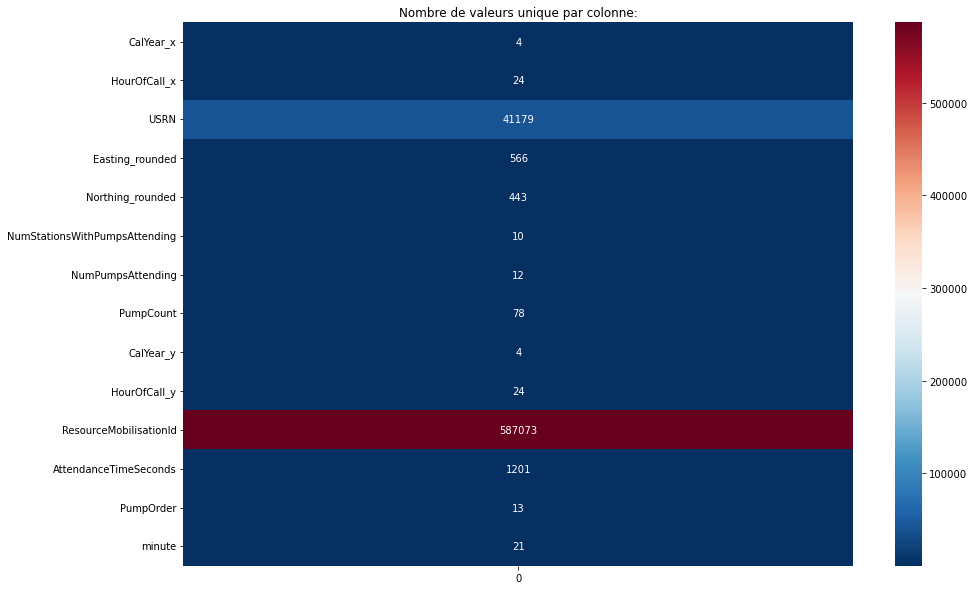

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=total_numerical.nunique().to_frame(), cmap='RdBu_r',fmt='d',annot=True).set_title('Nombre de valeurs unique par colonne:');

In [10]:
# Discrétisation des modalités
total_qualitative = pd.get_dummies(total_qualitative)


In [11]:
# Vérification de la dimension des données
total_qualitative.shape

(587073, 660)

In [12]:
# Merge des 2 datasets "indicatrices" et "qualitatives"
df_merge = pd.concat([total_numerical, total_qualitative], axis = 1)


In [13]:
# Séparation de la variable cible du reste des données avec un ratio de 80 - 20 %
y = df_merge.minute
X = df_merge.drop(["AttendanceTimeSeconds", "minute"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)


In [14]:
# Initialisation du modèle XGBoost
xgbr = xgb.XGBRegressor(verbosity=0) 
#xgbr = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 100)
                        
# Entrainement du modèle
xgbr.fit(X_train, y_train)


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [15]:
# Resultat de prédiction 
y_pred = xgbr.predict(X_test)

In [37]:
# Matrice de confusion
print(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))


Classe prédite  -1.225376   -0.658997   -0.601436   -0.562928   -0.525635   \
Classe réelle                                                                
0                        1           1           1           1           1   
1                        0           0           0           0           0   
2                        0           0           0           0           0   
3                        0           0           0           0           0   
4                        0           0           0           0           0   
5                        0           0           0           0           0   
6                        0           0           0           0           0   
7                        0           0           0           0           0   
8                        0           0           0           0           0   
9                        0           0           0           0           0   
10                       0           0           0           0  

In [16]:
# Score du modèle sur les données d'entrainements et de test
score = xgbr.score(X_train, y_train)  
print("Training score R²: ", xgbr.score(X_train, y_train))
print("Test score R²: ", xgbr.score(X_test, y_test))


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Training score R²:  0.4113613746125049


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Test score R²:  0.37771337811825967


In [ ]:
# Evaluation du score par cross validation
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())


In [39]:
# Calcul de l'erreur quadratique
# Marge d'erreur du modèle
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))


MSE: 3.77
RMSE: 1.94


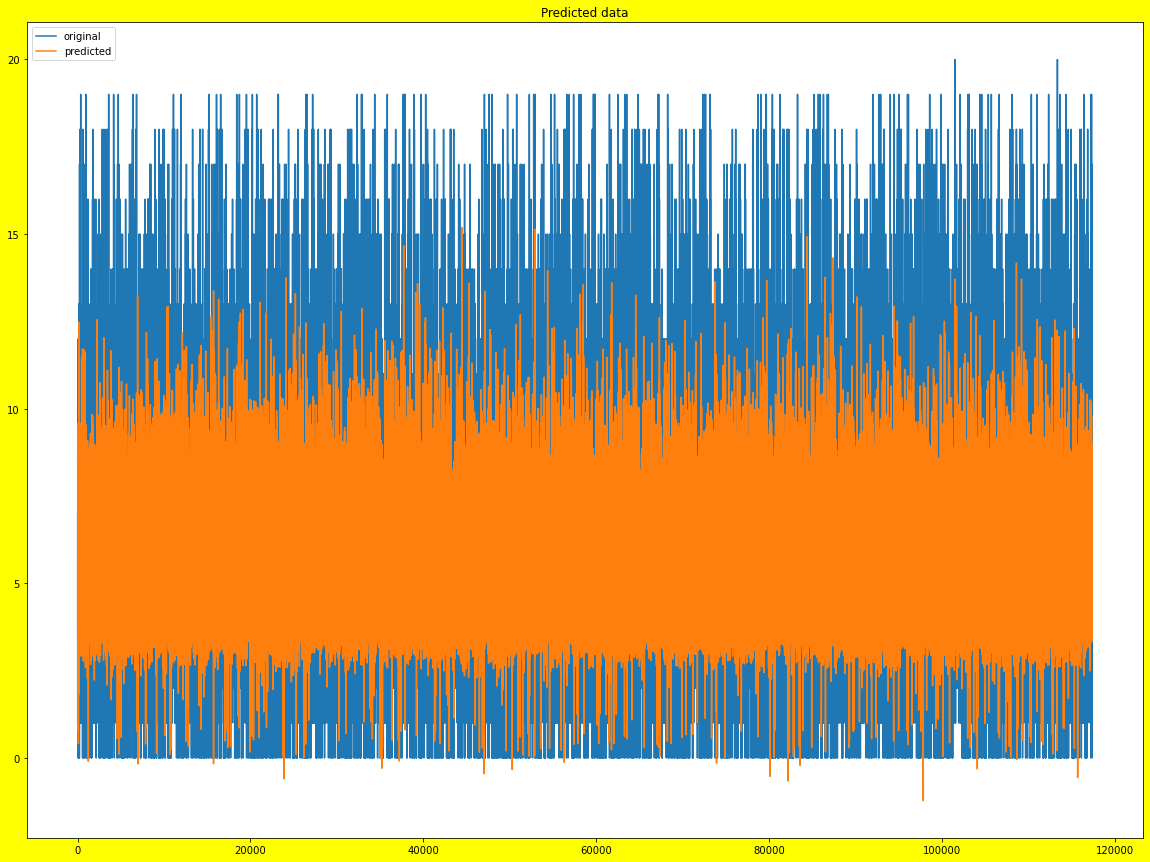

In [41]:
# Graphe des données prédites et originales
x_ax = range(len(y_test))

plt.figure(figsize=(20,15),
           facecolor='yellow')

plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")

plt.title("Predicted data")

plt.legend()
plt.show()

In [17]:
!pip install lime
import lime.lime_tabular  


Looking in indexes: https://artifactory-iva.si.francetelecom.fr/artifactory/api/pypi/pythonproxy/simple


Intercept 27.002428785508563
Prediction_local [5.35665792]
Right: 5.5134444


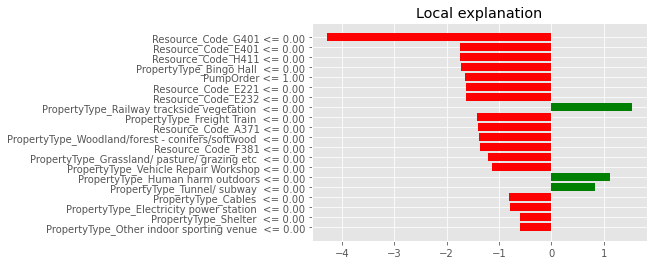

In [40]:
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_test), ## 2d array,
                    feature_names=X_test.columns, 
                    mode='regression',
                     verbose=True,
                 random_state= 1)### la prédiction se base sur un modèle linéaire
lime_results = explainer.explain_instance(X_test.iloc[0], 
                                  xgbr.predict ,# fonction de prediction
                                 num_features=20
                                )  ## le nombre maximale de variables présents dans l'explication
with plt.style.context("ggplot"):
    lime_results.as_pyplot_figure()


In [24]:
print("Score prédit : ", y_pred[0])
print("La valeur actuelle :     ", y_test.iloc[0])

Score prédit :  5.5134444
La valeur actuelle :      7


In [41]:
### La somme des contributions de toutes les variables
pd.DataFrame(lime_results.as_list())[1].sum()

-21.645770864230844

In [42]:
lime_results.as_list()

[('Resource_Code_G401 <= 0.00', -4.282458327848167),
 ('Resource_Code_E401 <= 0.00', -1.7453302579629646),
 ('Resource_Code_H411 <= 0.00', -1.7374967575158984),
 ('PropertyType_Bingo Hall  <= 0.00', -1.7314710059478573),
 ('PumpOrder <= 1.00', -1.6464190543517894),
 ('Resource_Code_E221 <= 0.00', -1.6341084615701593),
 ('Resource_Code_E232 <= 0.00', -1.633082125996627),
 ('PropertyType_Railway trackside vegetation  <= 0.00', 1.5345841334623878),
 ('PropertyType_Freight Train  <= 0.00', -1.411752023943695),
 ('Resource_Code_A371 <= 0.00', -1.410238633749457),
 ('PropertyType_Woodland/forest - conifers/softwood  <= 0.00',
  -1.390657727556499),
 ('Resource_Code_F381 <= 0.00', -1.3669624993451066),
 ('PropertyType_Grassland/ pasture/ grazing etc  <= 0.00',
  -1.2020665398391952),
 ('PropertyType_Vehicle Repair Workshop <= 0.00', -1.1435884439396677),
 ('PropertyType_Human harm outdoors <= 0.00', 1.1270153957700553),
 ('PropertyType_Tunnel/ subway  <= 0.00', 0.8314334479615865),
 ('Propert

In [43]:
lime_results.show_in_notebook(show_table=True, show_all=False)


In [44]:
X_test.iloc[0]

CalYear_x                            2021.0
HourOfCall_x                           20.0
USRN                             20701974.0
Easting_rounded                    529050.0
Northing_rounded                   192350.0
                                    ...    
Resource_Code_H431                      0.0
Resource_Code_H432                      0.0
PerformanceReporting_1                  1.0
PerformanceReporting_2                  0.0
PerformanceReporting_Not Used           0.0
Name: 495573, Length: 672, dtype: float64